In [313]:
# Import necessary libraries

# Your code here
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [314]:
# Read the datafile "covid.csv"
df = pd.read_csv('covid.csv')

# Take a quick look at the dataframe
df.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [315]:
# Check if there are any missing or Null values
# df[df.isnull().sum(axis=1) == True].shape[0]
df.shape[0] - df.dropna().shape[0]


37

In [316]:
### edTest(test_na) ###

# Find the number of rows with missing values
num_null = df.shape[0] - df.dropna().shape[0]
print("Number of rows with null values:", num_null)


Number of rows with null values: 37


In [317]:
# Before imputing, I am going to try to scale age.

cv_age = df['age'].std() / df['age'].mean() 
cv_age

np.float64(0.36878989883294433)

(array([13.,  3.,  2.,  0.,  3.,  4.,  0.,  2.,  0.,  2.,  5., 38., 21.,
         2., 23., 24., 21., 42., 26., 17., 41., 36., 44., 44., 43., 36.,
        18., 33., 29., 70., 31., 36., 25.,  7.,  7., 58., 19., 30., 40.,
         5.,  8., 36., 21.,  1.,  8.,  6.,  2., 12.,  0.,  1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ,
        18.7, 20.4, 22.1, 23.8, 25.5, 27.2, 28.9, 30.6, 32.3, 34. , 35.7,
        37.4, 39.1, 40.8, 42.5, 44.2, 45.9, 47.6, 49.3, 51. , 52.7, 54.4,
        56.1, 57.8, 59.5, 61.2, 62.9, 64.6, 66.3, 68. , 69.7, 71.4, 73.1,
        74.8, 76.5, 78.2, 79.9, 81.6, 83.3, 85. ]),
 <BarContainer object of 50 artists>)

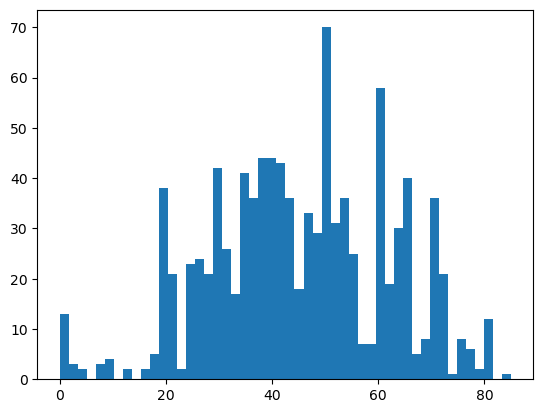

In [318]:
plt.hist(df['age'], bins = 50)

In [319]:
# changing age to be between 0 and 1
min_max_scaler = MinMaxScaler()


print('----------')
df['age'] = min_max_scaler.fit_transform(df[['age']])



----------


Scaling has not effected null values

In [320]:
# kNN impute the missing data
# Use a k value of 5

# Your code here
k = 5

In [321]:
### edTest(test_impute) ###
# Replace the original dataframe with the imputed data, continue to use df for the dataframe

# Your code here
k = 5
knn_imputer = KNNImputer(n_neighbors = k, weights = 'uniform')

x_columns = df.columns.drop('Urgency')

print(x_columns)

X = df[x_columns]
df[x_columns] = knn_imputer.fit_transform(X)

# Reverse scaling for age now that it has been imputed
df['age'] = min_max_scaler.inverse_transform(df[['age']])


Index(['age', 'sex', 'cough', 'fever', 'chills', 'sore_throat', 'headache',
       'fatigue'],
      dtype='object')


In [322]:
df.isnull().sum()

age            0
sex            0
cough          0
fever          0
chills         0
sore_throat    0
headache       0
fatigue        0
Urgency        0
dtype: int64

        ## EDA

Text(0.5, 0, 'Age group')

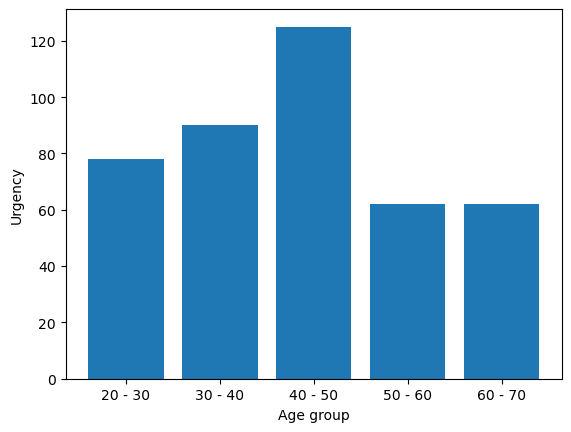

In [323]:
# Plot an appropriate graph to answer the following question
# Your code here
groups_num = 5
min_age = 20
current_age = min_age
max_age = 70
gap = 10

groups = []

for group in range(groups_num):
    dict = {}
    dict['low'] = current_age
    current_age += gap
    dict['high'] = current_age
    groups.append(dict)

means = []
stds = []

for group in groups:
    group
    low = group['low']
    high = group['high']
    group_urgency = df[(low < df['age']) & (df['age'] <= high)].Urgency

    means.append(group_urgency.sum())
    stds.append(group_urgency.std())

group_names = [f"{d['low']} - {d['high']}" for d in groups]


fig, ax = plt.subplots()

ax.bar(group_names, means)
ax.set_ylabel('Urgency')
ax.set_xlabel('Age group')

### ⏸ Which age group has the most urgent need for  a hospital bed?

#### A. 60 - 70 

#### B. 50 - 60 

#### C. 20 - 30

#### D. 40 - 50

In [325]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'


Text(0.5, 0, 'Symptom')

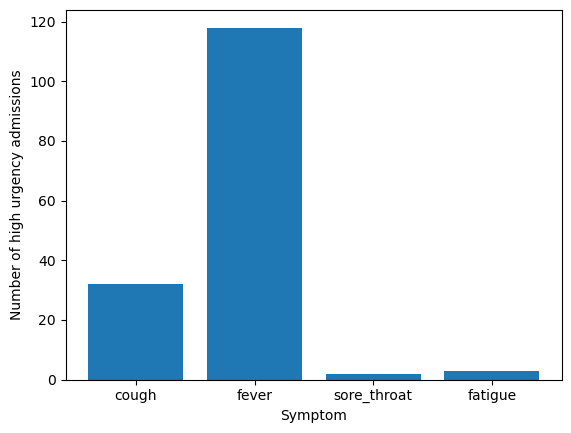

In [326]:
# Plot an appropriate graph to answer the following question    
# Your code here
symptoms = ['cough', 'fever', 'sore_throat', 'fatigue']
hosp_counts = []

for symptom in symptoms:
    hosp_counts.append(
            df[
                (df[symptom] == True) & 
                (df['Urgency'] == True)
            ].shape[0]
        )

fig, ax = plt.subplots()

ax.bar(symptoms, hosp_counts)
ax.set_ylabel('Number of high urgency admissions')
ax.set_xlabel('Symptom')

### ⏸ Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?

#### A. Cough

#### B. Fever

#### C. Sore Throat

#### D. Fatigue

In [327]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'


<BarContainer object of 2 artists>

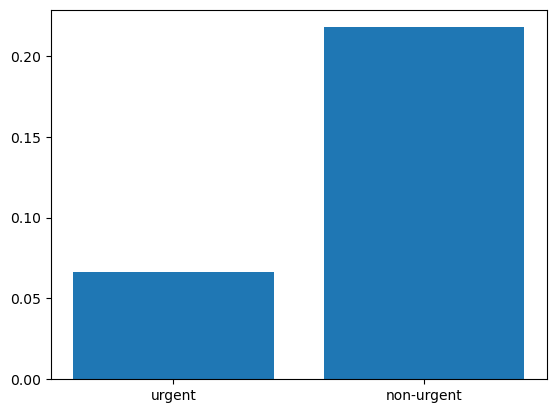

In [328]:
# Plot an appropriate graph to answer the following question    
# Your code here

mean_cough_no_urgency = (
    df[df['Urgency'] == False]['cough'].mean()
)

mean_cough_urgency = (
    df[df['Urgency'] == True]['cough'].mean()
)

fig, ax = plt.subplots()

ax.bar(['urgent', 'non-urgent'], [mean_cough_urgency, mean_cough_no_urgency])

### ⏸ As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?

#### A. True

#### B. False

#### C. It is the same

#### D. Cannot say

In [329]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'A'


### Train Test Split

In [330]:
### edTest(test_split) ###
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split

# Your code here
df_train, df_test = train_test_split(df, train_size = 0.7, random_state=60)

In [331]:
# Save the train data into a csv called "covid_train.csv"
# Remember to not include the default indices
df_train.to_csv('covid_train.csv', index=False)

# Save the test data into a csv called "covid_test.csv"
# Remember to not include the default indices
df_test.to_csv('covid_test.csv', index=False)
